In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
accidents = pd.read_csv('../data/accidents.csv')
casualties = pd.read_csv('../data/casualties.csv', on_bad_lines = 'skip')
vehicles = pd.read_csv('../data/vehicles.csv', on_bad_lines = 'skip')

In [4]:
accidents_vehicles = accidents.merge(vehicles,how='left', on='Accident_Index')

In [5]:
dead_car_casualties = casualties[(casualties['Casualty_Severity'] == 1) & (casualties['Casualty_Type'] == 9)]

In [6]:
dead_car_casualties = dead_car_casualties.merge(accidents_vehicles, how = 'left', on=['Accident_Index', 'Vehicle_Reference'])

In [7]:
deaths_by_point = dead_car_casualties.groupby(by='1st_Point_of_Impact').size()

In [8]:
deaths_by_point = pd.DataFrame(deaths_by_point).reset_index(drop=False)
deaths_by_point = deaths_by_point[deaths_by_point['1st_Point_of_Impact'] > 0]
deaths_by_point

,1st_Point_of_Impact,0
2,1.0,6293
3,2.0,497
4,3.0,1987
5,4.0,2018


In [9]:
hits_by_point = vehicles[vehicles['Vehicle_Type'] == 9]
hits_by_point = hits_by_point.groupby(by = '1st_Point_of_Impact').size()
hits_by_point = pd.DataFrame(hits_by_point).reset_index(drop=False)
hits_by_point = hits_by_point[hits_by_point['1st_Point_of_Impact'] > 0]

In [10]:
hits_by_point

,1st_Point_of_Impact,0
2,1,1095121
3,2,447518
4,3,298489
5,4,257854


In [11]:
deaths_hits = deaths_by_point.merge(hits_by_point, on='1st_Point_of_Impact')
deaths_hits = deaths_hits.assign(ratio = deaths_hits['0_x']/deaths_hits['0_y'])
deaths_hits

,1st_Point_of_Impact,0_x,0_y,ratio
0,1.0,6293,1095121,0.005746
1,2.0,497,447518,0.001111
2,3.0,1987,298489,0.006657
3,4.0,2018,257854,0.007826


In [12]:
names = ['Front', 'Back', 'Offside', 'Nearside']
deaths_hits['1st_Point_of_Impact'] = names
deaths_hits = deaths_hits.sort_values('ratio', ascending=False)

C:\Users\user\AppData\Local\Temp/ipykernel_26116/2287754876.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2}%'.format(x) for x in ax.get_yticks()])


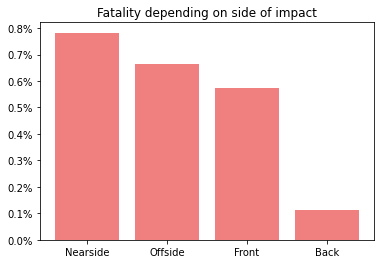

In [15]:
plot = plt.bar(x=deaths_hits['1st_Point_of_Impact'], height=deaths_hits['ratio']*100, color = 'lightcoral')
ax = plot[0].axes
ax.set_yticklabels(['{:,.2}%'.format(x) for x in ax.get_yticks()])
plt.title('Fatality depending on side of impact')
plt.savefig('../plots/fatals_by_impact_side.jpeg')